In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# library to handle data
import numpy as np 

 # library to handle JSON files
import json

 # tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library / you may need to uncomment the conda install if you haven't run folium before
# !conda install -c conda-forge folium=0.5.0 --yes  
import folium 

print('Libraries imported.')

Libraries imported.


In [126]:
# !wget -q -O 'SF_Inspection.csv' https://data.sfgov.org/resource/pyih-qa8i.csv
# print ('Data downloaded!')

In [127]:
import pandas as pd
# data = pd.read_csv('https://data.sfgov.org/resource/pyih-qa8i.csv')
data = pd.read_csv('Restaurant_Scores.csv')

In [128]:
# sf_df = pd.read_csv('https://data.sfgov.org/resource/pyih-qa8i.csv')
sf_df = pd.read_csv('Restaurant_Scores.csv')
sf_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,3196,United Irish Cultural Center,2700 45th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN
1,5959,ST. JOHN'S SNACK BAR,925 CHENERY St,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN
2,68451,Buckhorn Grill,101 04th St #1060,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,64682,Straw,203 Octavia St,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
4,68813,Small Foods,522 02nd St,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN


In [129]:
sf_df.shape

(21158, 17)

In [130]:
sf_df = sf_df
sf_df.head(7)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,3196,United Irish Cultural Center,2700 45th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN
1,5959,ST. JOHN'S SNACK BAR,925 CHENERY St,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN
2,68451,Buckhorn Grill,101 04th St #1060,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
3,64682,Straw,203 Octavia St,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN
4,68813,Small Foods,522 02nd St,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN
5,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,"(37.780834, -122.46659)",1.415576e+10,1203_20170905,09/05/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN
6,2409,Mission Hunan Restaurant,2960 16th St,San Francisco,CA,94103,37.765142,-122.419026,"(37.765142, -122.419026)",1.415563e+10,2409_20180806,08/06/2018 12:00:00 AM,NaN,Complaint,2409_20180806_103116,Inadequate food safety knowledge or lack of ce...,Moderate Risk


In [131]:
copy_sf_df.dropna(subset=['business_id','business_name',
                          'business_address','business_city','business_state',
                          'business_postal_code','business_latitude','business_longitude',
                          'business_location','business_phone_number','inspection_id',
                          'inspection_id','inspection_date','inspection_score','inspection_type',
                          'violation_id','violation_description'],inplace=True)

In [132]:
sf_df['business_id'].count()

21158

In [140]:
df_risk = sf_df.groupby('risk_category', axis=0).count()
df_risk.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,year
risk_category,,,,,,,,,,,,,,,,,
High Risk,2290,2290,2290,2290,2290,2267,2290,2290,2290,597,2290,2290,2098,2290,2290,2290,2290
Low Risk,8299,8299,8299,8299,8299,8219,8299,8299,8299,2234,8299,8299,7817,8299,8299,8299,8299
Moderate Risk,6164,6164,6164,6164,6164,6104,6164,6164,6164,1668,6164,6164,5816,6164,6164,6164,6164


In [141]:
df_risk_score = sf_df.groupby('risk_category', axis=0)['inspection_score'].mean()
df_risk_score.head()

risk_category
High Risk        80.406101
Low Risk         87.220289
Moderate Risk    85.199794
Name: inspection_score, dtype: float64

In [135]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


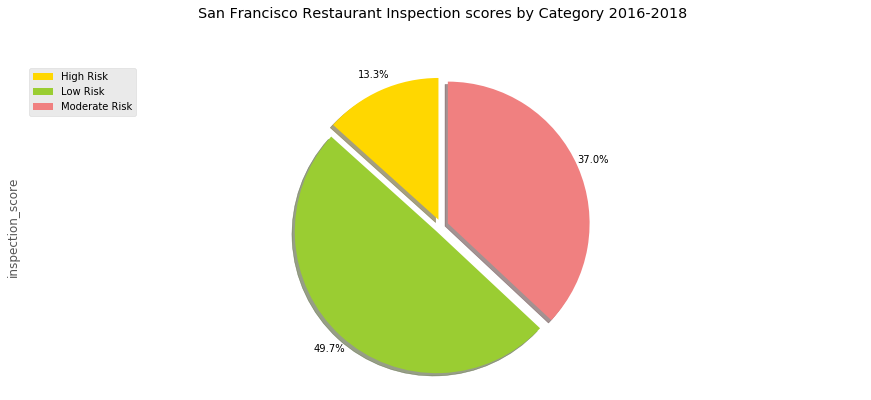

In [154]:
colors_list = ['gold', 'yellowgreen', 'lightcoral',]
explode_list = [0.05, 0.05, 0.05] # ratio for each continent with which to offset each wedge.

df_risk['inspection_score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('San Francisco Restaurant Inspection Scores by Category 2016-2018', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

In [142]:
sf_df_year = sf_df.groupby(['risk_category','inspection_date'])['inspection_score'].count()
sf_df_year.head(20)

risk_category  inspection_date       
High Risk      01/02/2018 12:00:00 AM     3
               01/03/2017 12:00:00 AM     6
               01/03/2018 12:00:00 AM     4
               01/04/2017 12:00:00 AM     3
               01/04/2018 12:00:00 AM     6
               01/05/2017 12:00:00 AM     9
               01/05/2018 12:00:00 AM     3
               01/06/2017 12:00:00 AM     2
               01/08/2018 12:00:00 AM     7
               01/09/2017 12:00:00 AM     4
               01/09/2018 12:00:00 AM     6
               01/10/2017 12:00:00 AM    11
               01/10/2018 12:00:00 AM     7
               01/11/2017 12:00:00 AM     5
               01/11/2018 12:00:00 AM     5
               01/12/2017 12:00:00 AM     5
               01/12/2018 12:00:00 AM     1
               01/13/2017 12:00:00 AM     1
               01/16/2018 12:00:00 AM     4
               01/17/2017 12:00:00 AM     1
Name: inspection_score, dtype: int64

In [155]:
sf_df['year'] = pd.DatetimeIndex(sf_df['inspection_date']).year
sf_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
0,3196,United Irish Cultural Center,2700 45th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,2017
1,5959,ST. JOHN'S SNACK BAR,925 CHENERY St,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018
2,68451,Buckhorn Grill,101 04th St #1060,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018
3,64682,Straw,203 Octavia St,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,2018
4,68813,Small Foods,522 02nd St,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,2018


In [156]:
sf_df_year = sf_df.groupby(['risk_category','year'])['inspection_score'].count()
sf_df_year.head(20)

risk_category  year
High Risk      2016     352
               2017     959
               2018     787
Low Risk       2016    1445
               2017    3369
               2018    3003
Moderate Risk  2016    1136
               2017    2411
               2018    2269
Name: inspection_score, dtype: int64

In [157]:
un_SF_df = sf_df_year.unstack()

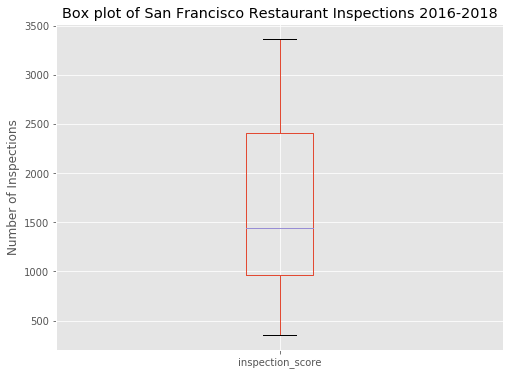

In [158]:
sf_df_year.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of San Francisco Restaurant Inspections 2016-2018')
plt.ylabel('Number of Inspections')

plt.show()

In [159]:
years = list(map(str, range(2016, 2018)))

sf_df_year.index

MultiIndex(levels=[['High Risk', 'Low Risk', 'Moderate Risk'], [2016, 2017, 2018]],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['risk_category', 'year'])

In [160]:
df_gptest = sf_df[['risk_category','year','inspection_score']]
df_risk_year = df_gptest.groupby(['risk_category','year'],as_index= False).count()
df_risk_year

,risk_category,year,inspection_score
0,High Risk,2016,352
1,High Risk,2017,959
2,High Risk,2018,787
3,Low Risk,2016,1445
4,Low Risk,2017,3369
5,Low Risk,2018,3003
6,Moderate Risk,2016,1136
7,Moderate Risk,2017,2411
8,Moderate Risk,2018,2269


In [161]:
all(isinstance(column, str) for column in df_risk_year.columns)

True

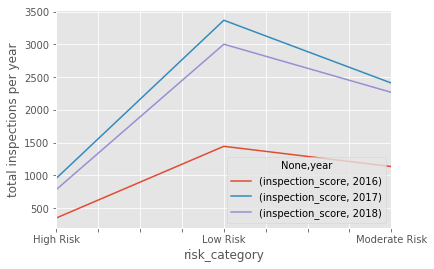

In [162]:
#grouped_pivot
grouped_pivot = df_risk_year.pivot(index='risk_category',columns='year').plot()

plt.ylabel('total inspections per year');


In [163]:
import seaborn as sns
import re

In [165]:
new_SF_df = sf_df
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\d+', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
0,3196,United Irish Cultural Center,th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,2017
1,5959,ST. JOHN'S SNACK BAR,CHENERY St,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018
2,68451,Buckhorn Grill,th St #,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018
3,64682,Straw,Octavia St,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,2018
4,68813,Small Foods,nd St,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,2018


In [166]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
0,3196,United Irish Cultural Center,th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,2017
1,5959,ST. JOHN'S SNACK BAR,CHENERY,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018
2,68451,Buckhorn Grill,th #,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018
3,64682,Straw,Octavia,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,2018
4,68813,Small Foods,nd,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,2018


In [167]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
0,3196,United Irish Cultural Center,th Ave,San Francisco,CA,94116,37.735943,-122.503086,"(37.735943, -122.503086)",NaN,3196_20170201,02/01/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,2017
1,5959,ST. JOHN'S SNACK BAR,CHENERY,San Francisco,CA,94131,37.735264,-122.437679,"(37.735264, -122.437679)",1.415559e+10,5959_20180403,04/03/2018 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018
2,68451,Buckhorn Grill,th #,San Francisco,CA,94103,37.784548,-122.404190,"(37.784548, -122.40419)",NaN,68451_20180226,02/26/2018 12:00:00 AM,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018
3,64682,Straw,Octavia,San Francisco,CA,94102,37.773928,-122.424190,"(37.773928, -122.42419)",NaN,64682_20181116,11/16/2018 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,2018
4,68813,Small Foods,nd,San Francisco,CA,94107,37.782803,-122.393379,"(37.782803, -122.393379)",NaN,68813_20180521,05/21/2018 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,2018


In [168]:
ins_count = new_SF_df.groupby('business_postal_code').count()
ins_count

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
business_postal_code,,,,,,,,,,,,,,,,,
92672,5,5,5,5,5,5,5,5,5,5,5,4,5,4,4,4,5
94013,4,4,4,4,4,4,4,4,0,4,4,4,4,1,1,1,4
941,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
94101,17,17,17,17,17,17,17,17,0,17,17,5,17,14,14,14,17
94102,1443,1443,1443,1443,1443,1443,1443,1443,224,1443,1443,1120,1443,1117,1117,1117,1443
94103,1767,1767,1767,1767,1767,1767,1767,1767,636,1767,1767,1233,1767,1315,1315,1315,1767
94104,342,342,342,342,342,342,342,342,52,342,342,296,342,299,299,299,342
94105,562,562,562,562,562,562,562,562,20,562,562,438,562,440,440,440,562
94107,842,842,842,842,842,842,842,842,180,842,842,635,842,644,644,644,842


In [169]:
df_all_year = un_SF_df.T
df_all_year

risk_category,High Risk,Low Risk,Moderate Risk
year,,,
2016,352,1445,1136
2017,959,3369,2411
2018,787,3003,2269


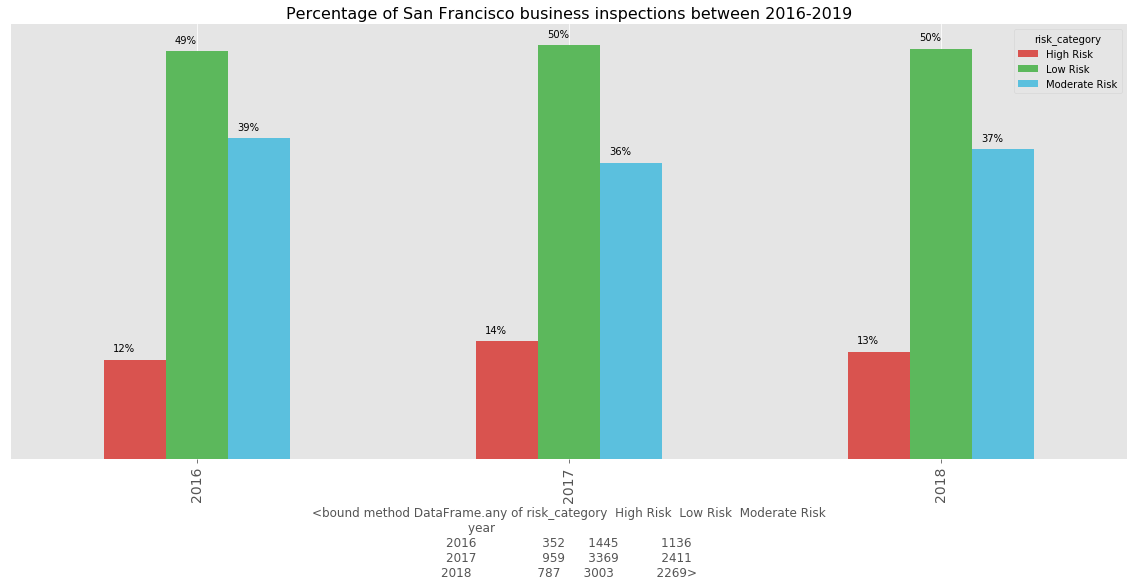

In [170]:
ax = df_all_year.div(df_all_year.sum(1), 
                    axis=0).plot(kind='bar', 
                    color=['#d9534f','#5cb85c', '#5bc0de'], 
                    figsize=(20, 8))

ax.set_title("Percentage of San Francisco business inspections between 2016-2019",fontsize=16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
ax.set_xlabel(df_all_year.any)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

In [171]:
sf_count= new_SF_df['business_postal_code'].value_counts().to_frame()
sf_count .rename(columns={'business_postal_code': 'Count'}, inplace=True)
sf_count.index.name ='business_postal_code'
sf_count.reset_index(level=0, inplace=True)
sf_count
# new_SF_df['business_id'].count()

,business_postal_code,Count
0,94110,2694
1,94103,1767
2,94109,1673
3,94133,1631
4,94102,1443
5,94112,1005
6,94122,924
7,94118,898
8,94107,842
9,94115,841


In [172]:
sf_df['inspection_date'] = pd.to_datetime(new_SF_df['inspection_date'])

In [173]:
m_SF_df = sf_df.drop(columns=['business_location', 'business_phone_number', 'business_city' ,'business_state'])
m_SF_df.head(5)

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year
0,3196,United Irish Cultural Center,th Ave,94116,37.735943,-122.503086,3196_20170201,2017-02-01,NaN,Reinspection/Followup,NaN,NaN,NaN,2017
1,5959,ST. JOHN'S SNACK BAR,CHENERY,94131,37.735264,-122.437679,5959_20180403,2018-04-03,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018
2,68451,Buckhorn Grill,th #,94103,37.784548,-122.404190,68451_20180226,2018-02-26,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018
3,64682,Straw,Octavia,94102,37.773928,-122.424190,64682_20181116,2018-11-16,NaN,Complaint,NaN,NaN,NaN,2018
4,68813,Small Foods,nd,94107,37.782803,-122.393379,68813_20180521,2018-05-21,NaN,Non-inspection site visit,NaN,NaN,NaN,2018


In [174]:
m_SF_df['risk_category'].value_counts()

Low Risk         8299
Moderate Risk    6164
High Risk        2290
Name: risk_category, dtype: int64

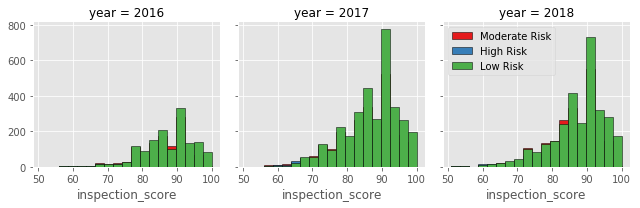

In [175]:
bins = np.linspace(m_SF_df.inspection_score.min(), m_SF_df.inspection_score.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'inspection_score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

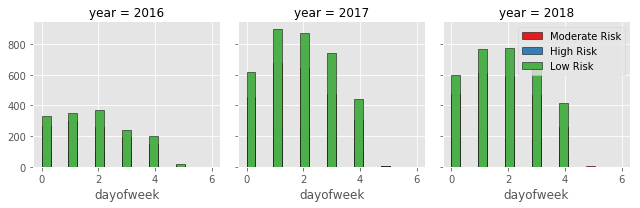

In [176]:
m_SF_df['dayofweek'] = m_SF_df['inspection_date'].dt.dayofweek
bins = np.linspace(m_SF_df.dayofweek.min(), m_SF_df.dayofweek.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [177]:
m_SF_df['weekend'] = m_SF_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
m_SF_df.head()

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,dayofweek,weekend
0,3196,United Irish Cultural Center,th Ave,94116,37.735943,-122.503086,3196_20170201,2017-02-01,NaN,Reinspection/Followup,NaN,NaN,NaN,2017,2,0
1,5959,ST. JOHN'S SNACK BAR,CHENERY,94131,37.735264,-122.437679,5959_20180403,2018-04-03,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018,1,0
2,68451,Buckhorn Grill,th #,94103,37.784548,-122.404190,68451_20180226,2018-02-26,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,2018,0,0
3,64682,Straw,Octavia,94102,37.773928,-122.424190,64682_20181116,2018-11-16,NaN,Complaint,NaN,NaN,NaN,2018,4,1
4,68813,Small Foods,nd,94107,37.782803,-122.393379,68813_20180521,2018-05-21,NaN,Non-inspection site visit,NaN,NaN,NaN,2018,0,0


In [178]:
m_SF_df.groupby(['year'])['risk_category'].value_counts(normalize=True)

year  risk_category
2016  Low Risk         0.492378
      Moderate Risk    0.384690
      High Risk        0.122932
2017  Low Risk         0.498053
      Moderate Risk    0.357341
      High Risk        0.144605
2018  Low Risk         0.493825
      Moderate Risk    0.371720
      High Risk        0.134455
Name: risk_category, dtype: float64

In [179]:
m_SF_df['risk_category'].replace(to_replace=['Low Risk','Moderate Risk','High Risk'], value=[1,2,3],inplace=True)
m_SF_df.head()

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,dayofweek,weekend
0,3196,United Irish Cultural Center,th Ave,94116,37.735943,-122.503086,3196_20170201,2017-02-01,NaN,Reinspection/Followup,NaN,NaN,NaN,2017,2,0
1,5959,ST. JOHN'S SNACK BAR,CHENERY,94131,37.735264,-122.437679,5959_20180403,2018-04-03,100.0,Routine - Unscheduled,NaN,NaN,NaN,2018,1,0
2,68451,Buckhorn Grill,th #,94103,37.784548,-122.404190,68451_20180226,2018-02-26,74.0,Routine - Unscheduled,68451_20180226_103119,Inadequate and inaccessible handwashing facili...,2.0,2018,0,0
3,64682,Straw,Octavia,94102,37.773928,-122.424190,64682_20181116,2018-11-16,NaN,Complaint,NaN,NaN,NaN,2018,4,1
4,68813,Small Foods,nd,94107,37.782803,-122.393379,68813_20180521,2018-05-21,NaN,Non-inspection site visit,NaN,NaN,NaN,2018,0,0
